In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_lst = []
for i in range(56):
    df_lst.append( pd.read_csv('./data/Kickstarter{:03d}.csv'.format(i)) )


In [7]:
df = pd.concat(df_lst, ignore_index=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   backers_count             209222 non-null  int64  
 1   blurb                     209214 non-null  object 
 2   category                  209222 non-null  object 
 3   converted_pledged_amount  209222 non-null  int64  
 4   country                   209222 non-null  object 
 5   created_at                209222 non-null  int64  
 6   creator                   209222 non-null  object 
 7   currency                  209222 non-null  object 
 8   currency_symbol           209222 non-null  object 
 9   currency_trailing_code    209222 non-null  bool   
 10  current_currency          209222 non-null  object 
 11  deadline                  209222 non-null  int64  
 12  disable_communication     209222 non-null  bool   
 13  friends                   300 non-null     o

In [10]:
df.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,21,2006 was almost 7 years ago.... Can you believ...,"{""id"":43,""name"":""Rock"",""slug"":""music/rock"",""po...",802,US,1387659690,"{""id"":1495925645,""name"":""Daniel"",""is_registere...",USD,$,True,...,new-final-round-album,https://www.kickstarter.com/discover/categorie...,True,False,successful,1391899046,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",802.00000,international
1,97,An adorable fantasy enamel pin series of princ...,"{""id"":54,""name"":""Mixed Media"",""slug"":""art/mixe...",2259,US,1549659768,"{""id"":1175589980,""name"":""Katherine"",""slug"":""fr...",USD,$,True,...,princess-pals-enamel-pin-series,https://www.kickstarter.com/discover/categorie...,True,False,successful,1551801611,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",2259.00000,international
2,88,Helping a community come together to set the s...,"{""id"":280,""name"":""Photobooks"",""slug"":""photogra...",29638,US,1477242384,"{""id"":1196856269,""name"":""MelissaThomas"",""is_re...",USD,$,True,...,their-life-through-their-lens-the-amish-and-me...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1480607932,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",29638.00000,international
3,193,Every revolution starts from the bottom and we...,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",49158,IT,1540369920,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,€,False,...,wao-the-eco-effect-shoes,https://www.kickstarter.com/discover/categorie...,True,False,successful,1544309940,1.136525,"{""web"":{""project"":""https://www.kickstarter.com...",49075.15252,international
4,20,Learn to build 10+ Applications in this comple...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",549,US,1425706517,"{""id"":1870845385,""name"":""Kalpit Jain"",""is_regi...",USD,$,True,...,apple-watch-development-course,https://www.kickstarter.com/discover/categorie...,False,False,failed,1428511019,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",549.00000,domestic


# Data exploration

## Target classes and balance

In [11]:
df['state'].value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

There are 

## Date time

In [13]:
pd.to_datetime(df['state_changed_at'], unit='s').describe()

count                  209222
unique                 172048
top       2018-07-04 03:59:00
freq                       56
first     2009-05-03 07:00:17
last      2019-03-14 04:12:21
Name: state_changed_at, dtype: object

## Country

In [43]:
ratio = lambda x: 100*round(x.value_counts()['successful'] / (x.value_counts()['successful'] + x.value_counts()['failed'] + x.value_counts()['canceled']), 4)

In [48]:
success_per_country = pd.pivot_table(df, index='country', values='state', aggfunc=ratio).rename(columns={'state':'success_ratio'}).sort_values(by='success_ratio', ascending=False)
success_per_country

,success_ratio
country,
HK,76.70
JP,73.19
LU,66.07
SG,64.20
GB,62.69
US,59.49
DK,57.76
NZ,55.53
CA,55.10


<AxesSubplot:xlabel='success_ratio', ylabel='country'>

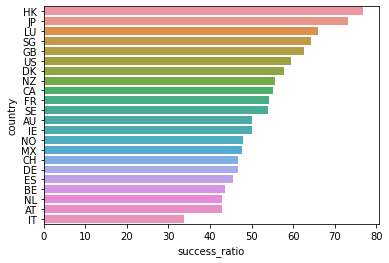

In [49]:
from matplotlib.pyplot import xcorr
sns.barplot(data=success_per_country.reset_index(), y='country', x='success_ratio')

In [56]:
df.query("currency == 'EUR'").head(2)

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
3,193,Every revolution starts from the bottom and we...,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",49158,IT,1540369920,"{""id"":1569700626,""name"":""WAO"",""slug"":""wearewao...",EUR,€,False,...,wao-the-eco-effect-shoes,https://www.kickstarter.com/discover/categorie...,True,False,successful,1544309940,1.136525,"{""web"":{""project"":""https://www.kickstarter.com...",49075.15252,international
13,6210,NAKEFIT: Hypoallergenic adhesive pad for walki...,"{""id"":266,""name"":""Footwear"",""slug"":""fashion/fo...",336729,IT,1491519205,"{""id"":1840198615,""name"":""Sabato Alterio"",""is_r...",EUR,€,False,...,nakefit,https://www.kickstarter.com/discover/categorie...,True,False,successful,1499455934,1.099700,"{""web"":{""project"":""https://www.kickstarter.com...",324435.66090,international


In [53]:
print(df.category[0])
print(df.category[1000])
print(df.category[20000])
print(df.category[200000])

{"id":43,"name":"Rock","slug":"music/rock","position":17,"parent_id":14,"color":10878931,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/music/rock"}}}
{"id":52,"name":"Hardware","slug":"technology/hardware","position":8,"parent_id":16,"color":6526716,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/technology/hardware"}}}
{"id":22,"name":"Illustration","slug":"art/illustration","position":4,"parent_id":1,"color":16760235,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/art/illustration"}}}
{"id":262,"name":"Accessories","slug":"fashion/accessories","position":1,"parent_id":9,"color":16752598,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/fashion/accessories"}}}


## Amounts: converted_pledged_amount, exchange rate

In [57]:
currency_delta = df['converted_pledged_amount'].astype(float) - df['usd_pledged'] * df['static_usd_rate']
currency_delta.describe()

count    2.092220e+05
mean    -8.551623e+01
std      1.270609e+04
min     -1.771501e+06
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.330207e+05
dtype: float64

In [61]:
currency_cols = ['country', 'converted_pledged_amount', 'currency', 'currency_symbol', 'fx_rate', 'usd_pledged', 'usd_type']
df[currency_delta > 900][currency_cols].head(2)

,country,converted_pledged_amount,currency,currency_symbol,fx_rate,usd_pledged,usd_type
56,SG,19699,SGD,$,0.737115,19338.586040,international
83,NO,2182,NOK,kr,0.115720,2088.859902,domestic


In [ ]:
df.currency_trailing_code

## Creator

In [70]:
print(df.creator[2])
print(df.creator[2000])
print(df.creator[200000])

{"id":1196856269,"name":"MelissaThomas","is_registered":null,"chosen_currency":null,"avatar":{"thumb":"https://ksr-ugc.imgix.net/assets/014/275/164/5a43d683fe375d78f111a3b975b1776d_original.jpg?ixlib=rb-1.1.0&w=40&h=40&fit=crop&v=1477513389&auto=format&frame=1&q=92&s=dc9207376e0c0d43f32031d8e9a281cf","small":"https://ksr-ugc.imgix.net/assets/014/275/164/5a43d683fe375d78f111a3b975b1776d_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1477513389&auto=format&frame=1&q=92&s=fcbeca6ca421aa49cd0ab3467666026d","medium":"https://ksr-ugc.imgix.net/assets/014/275/164/5a43d683fe375d78f111a3b975b1776d_original.jpg?ixlib=rb-1.1.0&w=160&h=160&fit=crop&v=1477513389&auto=format&frame=1&q=92&s=fcbeca6ca421aa49cd0ab3467666026d"},"urls":{"web":{"user":"https://www.kickstarter.com/profile/1196856269"},"api":{"user":"https://api.kickstarter.com/v1/users/1196856269?signature=1552621253.9f2e97a20efddf347cd2610cc3c200244cc8525f"}}}
{"id":1258230290,"name":"Shinz Productions","is_registered":null,"chosen_cu

## Feature overview

In [91]:
def investigate(col):
    print(df[[col]].info())
    print(df[[col]].nunique())

In [111]:
df[['pledged']].info()
# print(df['photo'][200])
#print(df['location'][2000])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209222 entries, 0 to 209221
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   pledged  209222 non-null  float64
dtypes: float64(1)
memory usage: 1.6 MB


| Column | Description | Dtype | Null | EDA status |
| - | - | - | - | - |
| `backers_count` | The number of participants of the kickstarter project | | | Done |
| `blurb` | Short description of the project by the project initiator. Max 135 characters. | | | Done | 
| `category` | Dictionary object. \n Contains `id, name, slug, position, parent_id, color, urls` | | | Open |
| `converted_pledged_amount` | Open | | | Open |
| `country` | Country of of Kickstarter account (?) | | | To be confirmed |
| `created_at`| Creation date of the project. UNIX time format | | | Done |
| `creator`| Dictionary of user details `id, name, is_registered, chosen_currency, ... | | | Open to list all dictionary entries|
| `currency`| Currency (3-digit code) by which the project is founded | | | Done |
| `currency_symbol`| Symbol related to `currency` feature. | | | Done |
| `currency_trailing_code`| | Bool | | Open |
| `current_currency`| Open | | | Open |
| `deadline`| Deadline of the project. UNIX time format | | | |
| `disable_communication`| Is the communication with the creator allowed? | Bool | | Done |
| `friends`| 300 entries with empty list object | | | See '300 question' |
| `fx_rate`| Open | | | Open. Currency topic. |
| `goal`| Target amount | | | By how much deviate the projects from the target? (successful vs. failed) |
| `id`| Intern kickstarter id | | | See '182-anomalia' |
| `is_backing`| 300 instances of 'False' | | | See '300 question' |
| `is_starrable`| Open | Bool | None | Open |
| `is_starred`| Open | | 298 False, 2 True | See '300 question' |
| `launched_at`| Date of publication on kickstarter | int64 | None | Done |
| `location`| Dictionary of location details | String | 208996 filled | Open |
| `name`| Project name. Limited to 60 chars. | String | 209222 filled | Open |
| `permissions`| 300 entries with empty list object ||| See '300 question' |
| `photo`| Dictionary of photo url, ...  | String | | See '182-anomalia' |
| `pledged`|||
| `profile`|||
| `slug`|||
| `source_url`|||
| `spotlight`|||
| `staff_pick`|||
| `state`|||
| `state_changed_at`|||
| `static_usd_rate`|||
| `urls`|||
| `usd_pledged`|||
| `usd_type` |||